In [2]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kartik.sonaghela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('APPLE_iPhone_SE.csv')
df.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb build quality 2. Great display. 3. Camera is great in good lighting conditions 4. Processing is great. 5. Sound is superb. 6. Call quality is great. 7...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type should definitely go for this. Nothing is better than XR, XS or 11. Best for price and usage.READ MORE"
3,5,Simply awesome,"This iPhone SE is the best phone ever you get. Beautifully designed gives a classy look in your palms. Moreover, performance wise it is a benchmark. You will not be disappointed in this budget. My..."
4,5,Classy product,This is my second iphone after iphone 4s. I’ve been a long time android user in between. I’ll tell you who this phone is for. Prospective buyers can then decide1. For photo and video enthusiasts. ...


In [6]:
# function to plot most frequent terms
def freq_words(x, terms ):
    all_words = ' '.join([text for text in x])
    
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 30 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()


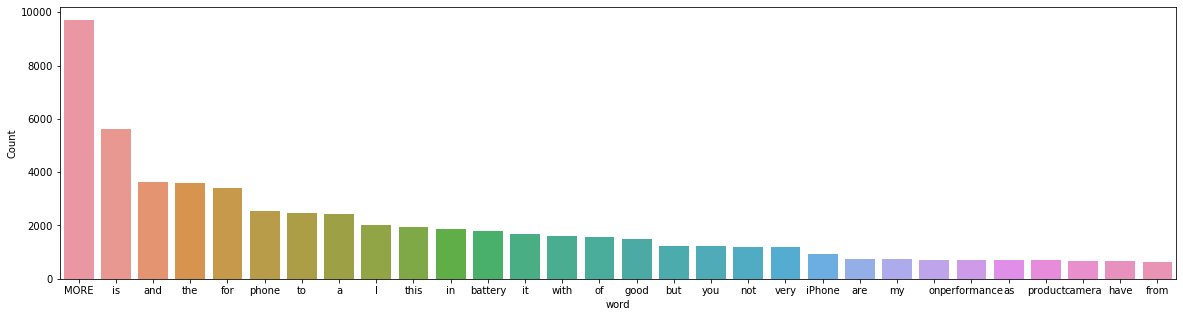

In [7]:
freq_words(df['Reviews'],30)

In [9]:
# remove unwanted characters, numbers and symbols
df['Reviews'] = df['Reviews'].str.replace("[^a-zA-Z#]", " ")

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [11]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['Reviews']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

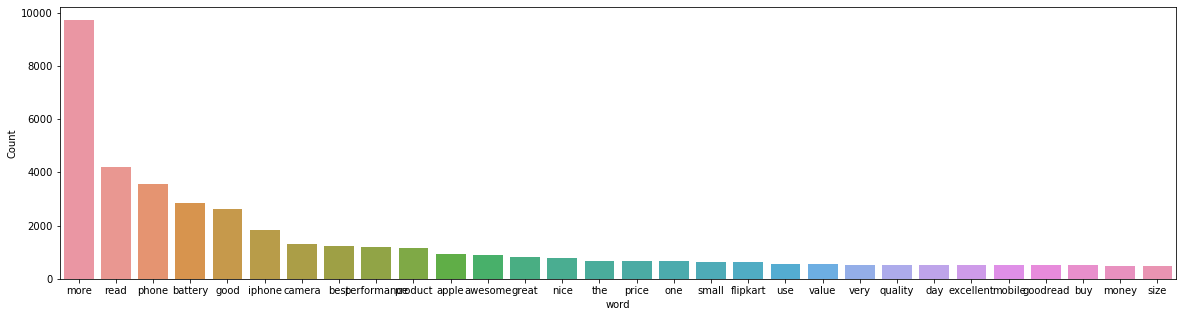

In [12]:
freq_words(reviews, 30)

In [13]:
!python -m spacy download en_core_web_sm 

2021-12-11 20:36:33.128889: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-11 20:36:33.128987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [15]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['great', 'device', 'let', 'tell', 'pros', 'superb', 'build', 'quality', 'great', 'display', 'camera', 'great', 'good', 'lighting', 'conditions', 'processing', 'great', 'sound', 'superb', 'call', 'quality', 'great', 'red', 'colour', 'looks', 'superb', 'portrait', 'mode', 'photography', 'superb', 'read', 'more']


In [16]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['great', 'device', 'pro', 'superb', 'build', 'quality', 'great', 'display', 'camera', 'great', 'good', 'lighting', 'condition', 'great', 'sound', 'superb', 'call', 'quality', 'great', 'red', 'colour', 'superb', 'portrait', 'mode', 'photography', 'superb']


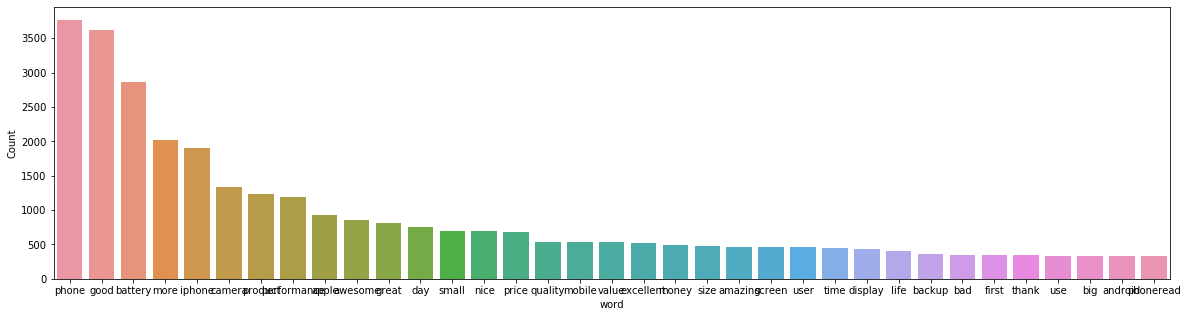

In [17]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))


df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [18]:
dictionary = corpora.Dictionary(reviews_2)

In [19]:
print(dictionary)
print(len(dictionary))
print(dictionary[1])

Dictionary(4544 unique tokens: ['battery', 'bluetooth', 'camera', 'car', 'couple']...)
4544
bluetooth


In [20]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [21]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [22]:
lda_model.print_topics()

[(0,
  '0.214*"awesome" + 0.078*"productread" + 0.038*"great" + 0.031*"satisfied" + 0.029*"read" + 0.028*"product" + 0.023*"red" + 0.017*"colour" + 0.016*"quality" + 0.015*"mobile"'),
 (1,
  '0.118*"iphone" + 0.074*"phone" + 0.046*"good" + 0.035*"apple" + 0.026*"more" + 0.024*"great" + 0.023*"camera" + 0.021*"price" + 0.021*"first" + 0.020*"performance"'),
 (2,
  '0.081*"small" + 0.052*"phone" + 0.048*"size" + 0.045*"screen" + 0.038*"worth" + 0.032*"perfect" + 0.026*"big" + 0.022*"handy" + 0.021*"apple" + 0.017*"device"'),
 (3,
  '0.106*"product" + 0.070*"nice" + 0.070*"good" + 0.051*"phone" + 0.043*"phoneread" + 0.043*"delivery" + 0.040*"thank" + 0.029*"flipkart" + 0.029*"superb" + 0.028*"amazing"'),
 (4,
  '0.193*"more" + 0.019*"phone" + 0.019*"bad" + 0.013*"flipkart" + 0.012*"purchase" + 0.011*"time" + 0.011*"bbd" + 0.010*"sim" + 0.010*"buy" + 0.010*"don"'),
 (5,
  '0.088*"battery" + 0.056*"phone" + 0.034*"good" + 0.034*"day" + 0.023*"camera" + 0.021*"user" + 0.016*"performance" + 0

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.177355 -0.007625       1        1  27.715487
1      0.117582 -0.039587       2        1  22.490692
6      0.158774  0.156664       3        1  13.859671
3     -0.023474  0.214391       4        1  11.313964
2     -0.019858 -0.246922       5        1  10.300568
4     -0.062930 -0.159793       6        1   8.441080
0     -0.347448  0.082872       7        1   5.878538, topic_info=          Term         Freq        Total Category  logprob  loglift
18        more  1992.000000  1992.000000  Default  30.0000  30.0000
0      battery  2696.000000  2696.000000  Default  29.0000  29.0000
60      iphone  1785.000000  1785.000000  Default  28.0000  28.0000
161    awesome   845.000000   845.000000  Default  27.0000  27.0000
11        good  3376.000000  3376.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
138    product   112.350557  1097.733687   Topic7  -3.5587   0.5545
45     quality    63.940188   464.521663   Topic7  -4.1224   0.8508
110     mobile    58.910963   482.887004   Topic7  -4.2043   0.7301
231       hand    33.697686   174.680942   Topic7  -4.7629   1.1883
72   excellent    46.146102   503.972752   Topic7  -4.4485   0.4432

[394 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1114      4  0.972267     adapter
1932      5  0.912975     adaptor
286       4  0.968503  affordable
116       2  0.325144     amazing
116       4  0.487717     amazing
...     ...       ...         ...
746       4  0.955281      worthy
188       1  0.244605        year
188       2  0.748639        year
993       4  0.918157     youread
34        1  0.980376     youtube

[448 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 7, 4, 3, 5, 1])

In [24]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews_2, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#perplexity lower
#coherence higher great model


Perplexity:  -6.182700891818992

Coherence Score:  0.5089086431568461


In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [26]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=reviews_2, start=2, limit=50, step=1)


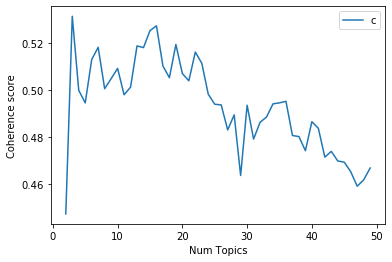

In [27]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [28]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4475
Num Topics = 3  has Coherence Value of 0.5312
Num Topics = 4  has Coherence Value of 0.4999
Num Topics = 5  has Coherence Value of 0.4945
Num Topics = 6  has Coherence Value of 0.5129
Num Topics = 7  has Coherence Value of 0.5181
Num Topics = 8  has Coherence Value of 0.5006
Num Topics = 9  has Coherence Value of 0.5048
Num Topics = 10  has Coherence Value of 0.5092
Num Topics = 11  has Coherence Value of 0.498
Num Topics = 12  has Coherence Value of 0.5012
Num Topics = 13  has Coherence Value of 0.5187
Num Topics = 14  has Coherence Value of 0.518
Num Topics = 15  has Coherence Value of 0.5252
Num Topics = 16  has Coherence Value of 0.5272
Num Topics = 17  has Coherence Value of 0.5102
Num Topics = 18  has Coherence Value of 0.5052
Num Topics = 19  has Coherence Value of 0.5193
Num Topics = 20  has Coherence Value of 0.507
Num Topics = 21  has Coherence Value of 0.5039
Num Topics = 22  has Coherence Value of 0.5161
Num Topics = 23  has Coh

In [29]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/Users/kartik.sonaghela/Documents/mallet-2.0.8/'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = r'C:/Users/kartik.sonaghela/Documents/mallet-2.0.8/bin/mallet' 
#You should update this path as per the path of Mallet directory on your system.

In [30]:
#mallet_path = r'C:\Users\kartik.sonaghela\Documents\mallet-2.0.8\bin\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=7, id2word=dictionary)

In [31]:
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=reviews_2, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0, [('product', 0.14487300094073377), ('apple', 0.09454374412041393), ('excellent', 0.06044214487300094), ('money', 0.054915333960489185), ('bad', 0.04056914393226717), ('delivery', 0.03751175917215428), ('flipkart', 0.03598306679209784), ('superb', 0.028222013170272814), ('happy', 0.02645813734713076), ('poor', 0.020578551269990593)]), (1, [('camera', 0.15119453924914675), ('performance', 0.11353811149032993), ('battery', 0.08156996587030717), ('good', 0.07428896473265074), ('quality', 0.060409556313993175), ('display', 0.02696245733788396), ('low', 0.025597269624573378), ('video', 0.020136518771331057), ('fast', 0.018657565415244597), ('light', 0.016496018202502846)]), (2, [('phone', 0.21870960159830768), ('awesome', 0.08473381125866729), ('amazing', 0.054883064990010576), ('price', 0.03419908332353978), ('love', 0.03408156070043483), ('compact', 0.03396403807732989), ('worth', 0.031025972499706192), ('handy', 0.0307909272534963), ('perfect', 0.02609002232929839), ('problem', 0.019

In [54]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [63]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, reviews_2, 20, 3,1)

3
0.5518458058308731
4
0.5878076010933839
5
0.6076412746309307
6
0.5733705206431271
7
0.546070862255078
8
0.5542144073416286
9
0.5007584885652454
10
0.4988892888928665
11
0.5006196365924809
12
0.4658070693036152
13
0.4777103517554759
14
0.4799453124739078
15
0.45199753078372606
16
0.47087705573507843
17
0.46972324738131466
18
0.47843133710881985
19
0.4536002978449164


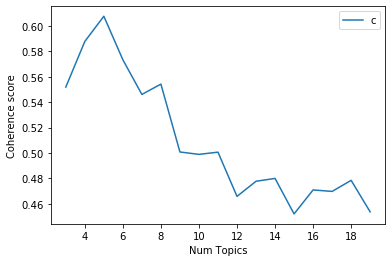

In [65]:
# Show graph
limit=20; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [66]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of")

Num Topics = 3  has Coherence Value of
Num Topics = 4  has Coherence Value of
Num Topics = 5  has Coherence Value of
Num Topics = 6  has Coherence Value of
Num Topics = 7  has Coherence Value of
Num Topics = 8  has Coherence Value of
Num Topics = 9  has Coherence Value of
Num Topics = 10  has Coherence Value of
Num Topics = 11  has Coherence Value of
Num Topics = 12  has Coherence Value of
Num Topics = 13  has Coherence Value of
Num Topics = 14  has Coherence Value of
Num Topics = 15  has Coherence Value of
Num Topics = 16  has Coherence Value of
Num Topics = 17  has Coherence Value of
Num Topics = 18  has Coherence Value of
Num Topics = 19  has Coherence Value of


In [67]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score \\
of {coherence_values[best_result_index]}''')

The 5 topics gives the highest coherence score \
of 0.6076412746309307


In [68]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LDA(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [69]:
#Creating Topic Distance Visualization 

pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.287196  0.339613       1        1  20.754854
1      0.274195 -0.324417       2        1  20.518879
0     -0.094707 -0.098006       3        1  20.481464
3     -0.253550  0.005296       4        1  19.380980
4     -0.213133  0.077515       5        1  18.863823, topic_info=          Term         Freq        Total Category  logprob  loglift
0      battery  3129.000000  3129.000000  Default  30.0000  30.0000
11        good  3972.000000  3972.000000  Default  29.0000  29.0000
60      iphone  2109.000000  2109.000000  Default  28.0000  28.0000
21       phone  4174.000000  4174.000000  Default  27.0000  27.0000
2       camera  1445.000000  1445.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
11        good  2040.812524  3972.735774   Topic5  -1.8251   1.0018
874  wonderful    51.265735    56.726618   Topic5  -5.5092   1.5667
154    perfect   153.797205   244.447861   Topic5  -4.4106   1.2046
789   friendly    39.267370    45.794027   Topic5  -5.7758   1.5142
21       phone   213.789011  4174.942558   Topic5  -4.0812  -1.3039

[299 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1114      3  0.996559     adapter
85        2  1.021452   advantage
286       5  0.994817  affordable
131       4  0.903245    aluminum
122       1  0.915603      amazed
...     ...       ...         ...
331       4  1.016151     working
105       5  1.001680       worth
188       3  0.999635        year
336       2  1.072525   yesterday
34        1  0.993527     youtube

[295 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])